# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [8]:
import pandas as pd
import numpy as np

from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# Visualize feature correlations (example using seaborn heatmap)
import seaborn as sns

# Log_r
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Tuning
from sklearn.model_selection import GridSearchCV

In [16]:
file_path = "Mobile_Price_Data.csv"
raw_df = pd.read_csv(file_path)

In [17]:
raw_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [18]:
# Show basic information about the dataset.
raw_df.info()
raw_df.describe()
# Display the null values in each column of the dataset.
raw_df.isnull().sum()
# Deal with missing values if needed.
raw_df.fillna(value=0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   float64
 18  touch_sc

In [19]:
# Length of the raw dataset
len(raw_df)

2000

In [20]:
# Cleaned Dataset
clean_df = raw_df.dropna()

In [21]:
# Display of the cleaned dataset 
print(clean_df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0         7.0   
1              1021     1          0.5         1   0       1        53.0   
2               563     1          0.5         1   2       1        41.0   
3               615     1          2.5         0   0       0        10.0   
4              1821     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1         2.0   
1996           1965     1          2.6         1   0       0        39.0   
1997           1911     0          0.9         1   1       1        36.0   
1998           1512     0          0.9         0   4       1        46.0   
1999            510     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0     

#### Corelation Analysis


In [22]:

correlation_values = clean_df.corr()

In [23]:
# Display of the correlated values
print(correlation_values)

               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.005663  0.042662     0.005655 -0.014129 -0.032854   
m_dep               0.035540  0.005420    -0.013640 -0.023491 -0.004247   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.010

In [24]:
# Correlation with Price Range
corr_list = correlation_values["price_range"]
ordered_corr_list = corr_list.sort_values(ascending=False)

In [25]:
# Display of correlated values with price range
print(ordered_corr_list)

price_range      1.000000
ram              0.916603
battery_power    0.200723
px_width         0.167253
px_height        0.148858
int_memory       0.043740
sc_w             0.038711
pc               0.033599
three_g          0.024119
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep           -0.001008
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


#### Comparing all the above data here "ram" has a high positive correlation of 0.917 with the price range. Here also "mobile_wt" has a high negative correlation of -0.030 which indicates heavy mobile phones has low price ranges.

In [26]:
# Choose important features using correlation analysis.
selected_features = ['clock_speed', 'dual_sim', 'mobile_wt']
X = clean_df[selected_features]
y = clean_df['price_range']

#### Dataset split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 3)
(400, 3)
(1600,)
(400,)


#### Logistic Regression


#### Model creation

In [28]:
# Initialize the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model using the training dataset.
logreg_model.fit(X_train, y_train)
# Predict the 'price range' on the training set and calculate the accuracy.
train_predictions = logreg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Make predictions for the 'price range' on the test set and compute the accuracy.
test_predictions = logreg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Display the accuracy scores for both the training set and the test set.
print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)

Accuracy on training set: 0.27625
Accuracy on test set: 0.2625


#### KNN Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Initialize the KNN model with an ad-hoc value for K (e.g., K=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model using the training dataset.
knn_model.fit(X_train, y_train)

# Predict the 'price range' on the training set and calculate the accuracy.
train_predictions = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Make predictions for the 'price range' on the test set and compute the accuracy.
test_predictions = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Display the accuracy scores for both the training set and the test set.
print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)

Accuracy on training set: 0.49625
Accuracy on test set: 0.2425


#### Tunning Grid search

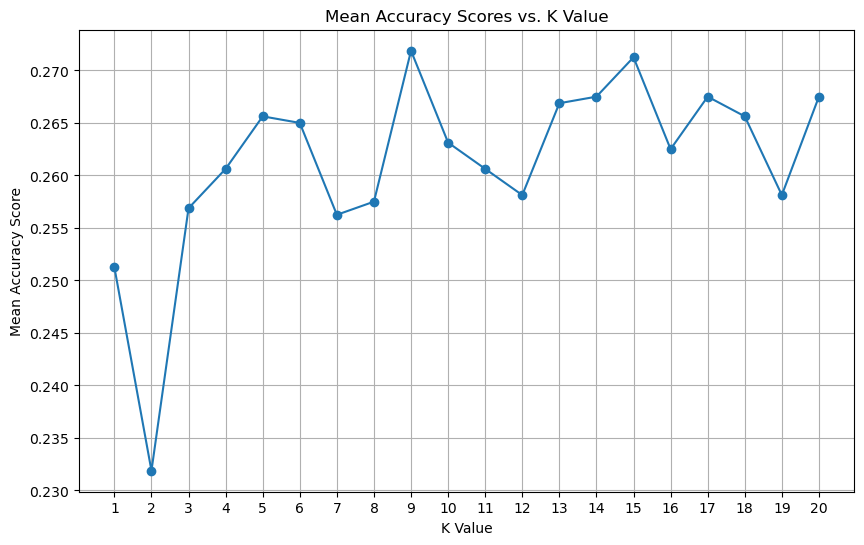

Best K value: 9
Mean Accuracy Score with Best K: 0.271875


In [31]:

import matplotlib.pyplot as plt

# Define a range of K values to search
k_values = list(range(1, 21))

# Define parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_values}

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Perform GridSearchCV to find the best K
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Identify the optimal K value and its associated mean test scores.
best_k = grid_search.best_params_['n_neighbors']
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Create visualizations to represent the results.
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Accuracy Scores vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Describe how the choice of K impacts the predictive performance of the model
print("Best K value:", best_k)
print("Mean Accuracy Score with Best K:", grid_search.best_score_)

#### FINDINGS AND INTERPRETATION

#### Both logistic regression and K-nearest neighbors (KNN) regression models were employed to train and assess their performance on the Mobile Price dataset for predicting the price range of mobile phones.

#### The logistic regression model performed better than the K-nearest neighbors (KNN) model, achieving higher accuracies on both the training and test sets when evaluated using the Mobile Price dataset for predicting mobile phone price ranges.

#### The logistic regression model performed better than the K-nearest neighbors (KNN) model in terms of accuracy on both the training and test sets.

#### The performance of the K-nearest neighbors (KNN) model could have been influenced by how the value of K was set, potentially leading to either overfitting or underfitting. However, despite these challenges, the KNN model should still have been capable of capturing non-linear relationships between features and the target variable.


#### Strength and weakness 

##### <b> <li> Strengths of Logistic Regression: </li> </b>
##### <li> Simplicity and interpretability: </li>The coefficients of the features in logistic regression are easier to interpret and understand.s
##### <li> Efficient for linearly separable data </li> When the boundary is linear it performs wel.

###### </ol> 


###### <ol> 
##### <b> <li> Weaknesses of Logistic Regression: </li> </b>
##### <li> Limited flexibilitLogistic regression assumes a linear relationship between features and the target variable, which may limit its ability to capture complex patterns in the data.ns. </li>
##### <li> Sensitivity to outlieOutliers have the potential to significantly impact the coefficients of a logistic regression model and its predictions.ons. </li>

###### </ol> </ol> 


###### <ol> 
##### <b> <li>Strengths of K-Nearest Neighbours: </li> </b>
##### <li>Non-parametr Does not impose strong assumptions about the underlying data distribution.on. </li>
##### <li> Flexibilican capture complex relationships between features and the target variable, making it particularly useful for handling non-linear data.ata. </li>
###### </ol> 